## Solving vehicle Routing with genetic Algorithm

![](2022-10-18-10-44-01.png)

In [1]:
import pandas as pd, numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [2]:
#inputs
nodes = pd.read_excel('data/route_inputs.xlsx', sheet_name='nodes')
paths = pd.read_excel('data/route_inputs.xlsx', sheet_name='paths')


In [3]:
nodes

,node,description
0,1,origin
1,2,middle point
2,3,middle point
3,4,middle point
4,5,middle point
5,6,middle point
6,7,destination


In [4]:
paths

,node_from,node_to,distance
0,1,2,220
1,1,3,1500
2,2,4,650
3,2,5,900
4,4,7,500
5,5,7,400
6,3,6,500
7,6,7,400


In [6]:
nVars = len(paths)
print(nVars)

8


In [7]:
#fitness function
def f(x):
    pen = 0
    
    #constraint sum(x) == 1 (origin)
    node_origin = int(nodes.node[nodes.description=='origin'])
    if sum([x[p] for p in paths.index[paths.node_from==node_origin]]) != 1:
        pen += 1000000 * np.abs(sum([x[p] for p in paths.index[paths.node_from==node_origin]]) - 1)
    
    #constraint sum(x) == 1 (destination)
    node_destination = int(nodes.node[nodes.description=='destination'])
    if sum([x[p] for p in paths.index[paths.node_to==node_destination]]) != 1:
        pen += 1000000 * np.abs(sum([x[p] for p in paths.index[paths.node_to==node_destination]]) - 1)
    
    #constraint sum(x, in) == sum(x, out), for each node
    for node in nodes.node[nodes.description=='middle point']:
        sum_in = sum([x[p] for p in paths.index[paths.node_to==node]])
        sum_out = sum([x[p] for p in paths.index[paths.node_from==node]])
        if sum_in != sum_out:
            pen += 1000000 * np.abs(sum_in - sum_out)
 
    #objective function and return
    objFun = sum([x[p] * paths.distance[p] for p in paths.index])
    return objFun + pen

    

In [8]:
#bounds and var type
varbounds = np.array([[0,1]]*nVars)
vartype = np.array([['int']]*nVars)

In [9]:
#GA parameters
algorithm_param = {'max_num_iteration': 500,
                   'population_size':100,
                   'mutation_probability':0.30,
                   'elit_ratio': 0.10,
                   'crossover_probability': 0.50,
                   'parents_portion': 0.30,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':100}


 The best solution found:                                                                           
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 1370.0


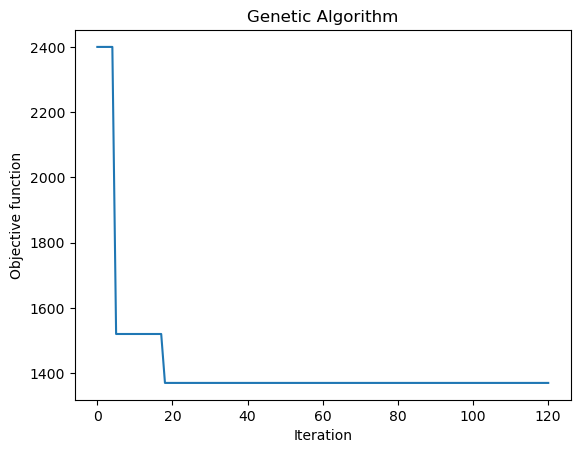

In [10]:
#Solve
model = ga(function=f,
           dimension=nVars,
           variable_type_mixed=vartype,
           variable_boundaries=varbounds,
           algorithm_parameters=algorithm_param)
model.run()

In [11]:
x = model.best_variable
objFun = model.best_function
paths['activated'] = 0
for p in paths.index:
    paths.activated[p] = x[p]
 
print('\n\nAll Paths:')
print(paths)
 
print('\nSelected Paths:')
print(paths[paths.activated==1])
 
print('\nTotal path:', objFun)



All Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
1          1        3      1500          0
2          2        4       650          1
3          2        5       900          0
4          4        7       500          1
5          5        7       400          0
6          3        6       500          0
7          6        7       400          0

Selected Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
2          2        4       650          1
4          4        7       500          1

Total path: 1370.0
